## Module submission header
### Submission preparation instructions 
_Completion of this header is mandatory, subject to a 2-point deduction to the assignment._ Only add plain text in the designated areas, i.e., replacing the relevant 'NA's. You must fill out all group member Names and Drexel email addresses in the below markdown list, under header __Module submission group__. It is required to fill out descriptive notes pertaining to any tutoring support received in the completion of this submission under the __Additional submission comments__ section at the bottom of the header. If no tutoring support was received, leave NA in place. You may as well list other optional comments pertaining to the submission at bottom. _Any distruption of this header's formatting will make your group liable to the 2-point deduction._

### Module submission group
- Group member 1
    - Name: Greg Morgan
    - Email: gm655@drexel.edu
- Group member 2
    - Name: Trev Pawlewicz
    - Email: tmp365@drexel.edu
- Group member 3
    - Name: Harsh Bolakani
    - Email: hvb36@drexel.edu

### Additional submission comments
- Tutoring support received: NA
- Other (other): NA

# Project - School Grade Analysis

## Part A: Exploratory Data Analysis

In this section, we will be doing EDA on the data set chosen for our project (https://www.kaggle.com/datasets/uciml/student-alcohol-consumption) 
This data set includes student data (personal, family etc) and the corresponding grade that they received in Math and Portuguese. Our Goal in this section is to determine factors that contribute to a good grade and find correltiaon of various factors with student grades

__A1.__ Load the csv data into a pandas data frame

In [227]:

import pandas as pd

def load_data(path_to_salaries_csv):
    
    df = pd.read_csv(path_to_salaries_csv, sep = ",", header =0)
    
    return df


In [228]:
# A1:SanityCheck

# Load the data using our function
student_data = load_data('./data/student-mat.csv')

# Output the first 10 rows
print(student_data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


__A1(Data Summary)__. Let us look at some high level information abut the data. Data information, Total rows, Total number of Girls and Boys etc.

In [229]:
print(student_data.info())
print(student_data["sex"].value_counts())
print("Total Counts: ", student_data["G3"].count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

__A2__. We will now try to visualize the Total grades of students using a histogram so we can find the variation and centrality of grades. We can also get basaic statistics about the final grades.

Grades Meta-data count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


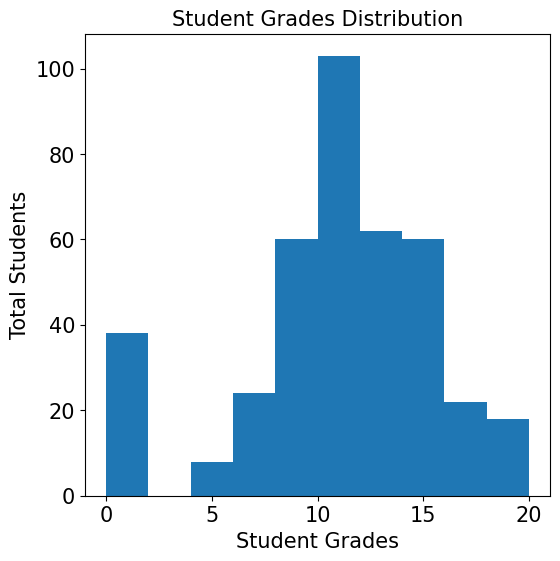

In [230]:
from matplotlib import pyplot as plt

hist_fig = plt.figure(figsize = (6,6))

_ = plt.hist(student_data["G3"])

plt.tick_params(labelsize = 15)

_ = plt.title("Student Grades Distribution", fontsize = 15)

_ = plt.xlabel("Student Grades", fontsize = 15)
_ = plt.ylabel("Total Students", fontsize = 15)

print("Grades Meta-data", student_data["G3"].describe())

__A3__. Next we can try to analyze if this same trend is observed with Girls and Boys seperately. For this we will filter the student_data data set based on sex column and plot this curve separately

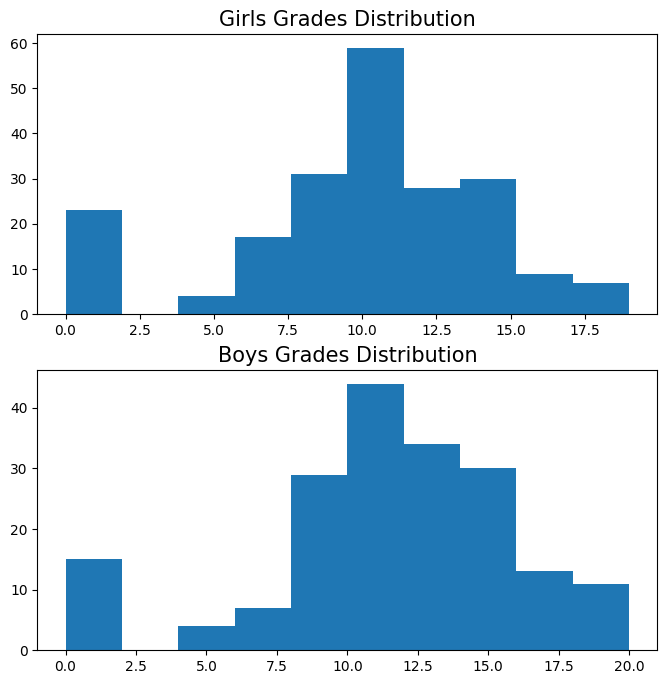

In [231]:
# A2:Inline(1/2)

girls_data = student_data[student_data["sex"] == "F"]
boys_data = student_data[student_data["sex"] == "M"]

fig = plt.figure(figsize = (8,8))

# girls plot
ax = fig.add_subplot(2,1,1)
_ = plt.hist(girls_data["G3"])
_ = plt.title("Girls Grades Distribution", fontsize = 15)
#_ = plt.xlabel("Student Grades", fontsize = 15)
#_ = plt.ylabel("Total Students", fontsize = 15)

# boys plot
ax = fig.add_subplot(2,1,2)
_ = plt.hist(boys_data["G3"])
_ = plt.title("Boys Grades Distribution", fontsize = 15)
#_ = plt.xlabel("Student Grades", fontsize = 15)
#_ = plt.ylabel("Total Students", fontsize = 15)





__A3(Summary).__ From the above comparison, it seems thata there are not big differences in the variations of grades in the case of boys and girls. So we will turn our attention to other parameters.

__A4__.We will now try to find relationship between Father and Mother's education to the final grade, G3 score. AAccording to the documentation of the data we havea the columns Medu and Fedu that correspond to Mother's and Father's education levels

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

We can use a scatter plot to visualize the replationship between mother's education and final grades of the students



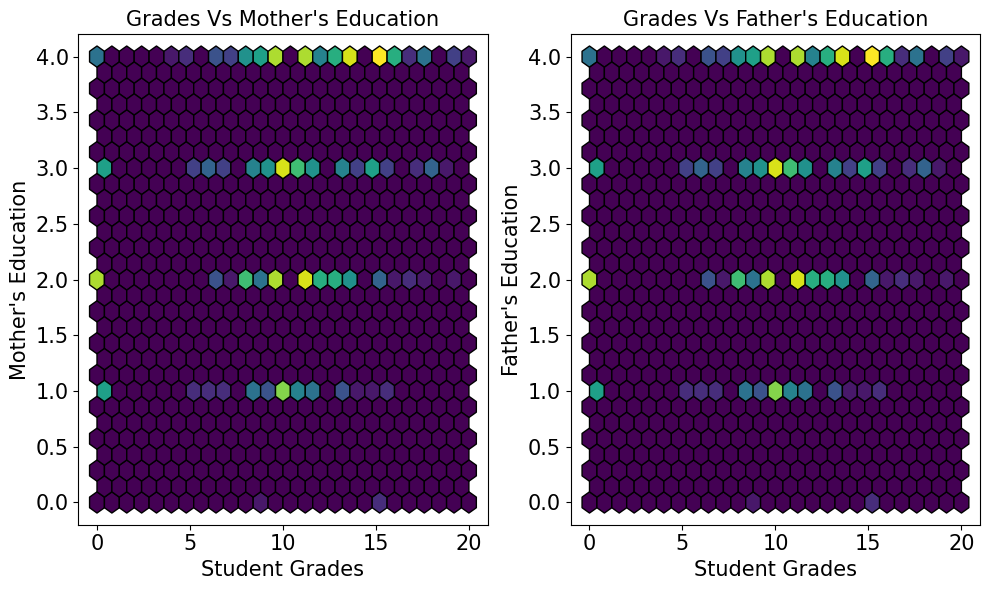

In [232]:

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,2,1)
_ = plt.hexbin(student_data["G3"],student_data["Medu"], color = "black", gridsize = 25)

plt.tick_params(labelsize = 15)

_ = plt.title("Grades Vs Mother's Education", fontsize = 15)

_ = plt.xlabel("Student Grades", fontsize = 15)
_ = plt.ylabel("Mother's Education", fontsize = 15)

ax = fig.add_subplot(1,2,2)
_ = plt.hexbin(student_data["G3"],student_data["Medu"], color = "black", gridsize = 25)

plt.tick_params(labelsize = 15)

_ = plt.title("Grades Vs Father's Education", fontsize = 15)

_ = plt.xlabel("Student Grades", fontsize = 15)
_ = plt.ylabel("Father's Education", fontsize = 15)

plt.tight_layout()




__A4.1__ It does seem like there is a positive correlation between the Mother's and Father's education with the students final grade. We can use a correlation paramter to confirm this hypothesis. In this section we will calculaate the spearman correlation between the Father's and Mother's education to verify this.

In [233]:
import scipy.stats

print("Correlation of Grades with Mother's education", round(scipy.stats.spearmanr(student_data["Medu"], student_data["G3"])[0],2))
print("Correlation of Grades with Father's education", round(scipy.stats.spearmanr(student_data["Fedu"], student_data["G3"])[0],2))

Correlation of Grades with Mother's education 0.23
Correlation of Grades with Father's education 0.17


__A4(Summary)__. It seems there is a better correlation with Mother's educetionwith student's gradaes and as seen in the visualization, the students that have the highest grades have their mother completed Higher education.

__A5__. Now let us compute the spearman correlation of all other numeric data with grades and find out if we have a feature that is highly correlataed with the student's Grades

In [234]:
list_features = [ column for column in list(student_data.columns) if student_data[column].dtype == "int64" ]
print(list_features)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


We will get the final correlation_list sorted on absolute value of correlation

In [235]:
# A5:Compute spearman correlation for all integet fields

correlation_list = [(feature,round(scipy.stats.spearmanr(student_data[feature], student_data["G3"])[0],2)) for feature in list_features]
sorted_correlation_list =  sorted(correlation_list, reverse=True, key= lambda x: abs(x[1]))
print(sorted_correlation_list)

[('G3', 1.0), ('G2', 0.96), ('G1', 0.88), ('failures', -0.36), ('Medu', 0.23), ('age', -0.17), ('Fedu', 0.17), ('goout', -0.17), ('traveltime', -0.12), ('Dalc', -0.12), ('studytime', 0.11), ('Walc', -0.1), ('famrel', 0.05), ('health', -0.05), ('absences', 0.02), ('freetime', -0.0)]


__A5(Summary)__. According to the output above, it seems like past failures have a negative correlation with grades. (We can ignore G1 and G2 scores as those are just factor into the calculation of the final grades

__A6__. Now we will visualize the relationship between the final grades and past failures.

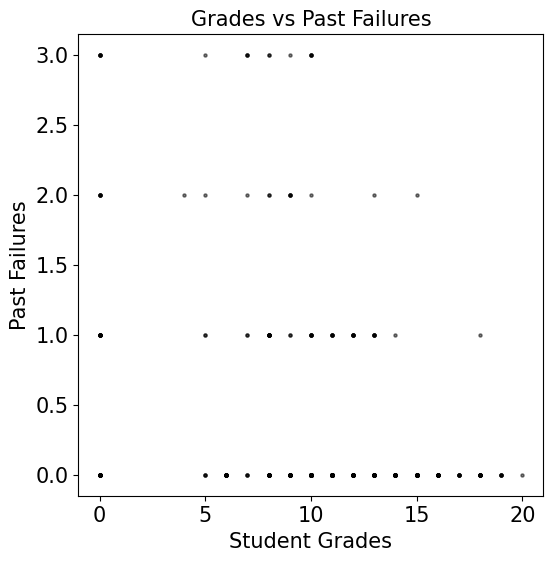

In [236]:
fig = plt.figure(figsize=(6,6))
                 
_ = plt.scatter(student_data["G3"], student_data["failures"], color="black", s=5, alpha=0.5)               
plt.tick_params(labelsize = 15)
_ = plt.title("Grades vs Past Failures", fontsize=15)
_ = plt.xlabel("Student Grades", fontsize = 15)
_ = plt.ylabel("Past Failures", fontsize=15)


__A6(Summary)__. From the visualization above, we can see that the students with higher grades are mostly the one's that haven't failed in the past

__A7.1.__ we will now explore the correlation with some of the non integer and categorical feilds such as whether the student is in a romantic relationship or if the student is interested in higher education and so on. For this we will have to do some preprocessing to turn them into integer values. We will use a value of 0 for No and 1 for Yes

In [237]:
def correlation_category(column,description):
    student_data[column+"_label"] = student_data.apply(lambda x: 1 if x[column]=="yes" else 0, axis=1)
    print("Correlation of Grades with "+description, round(scipy.stats.spearmanr(student_data[column+"_label"], student_data["G3"])[0],2))
    
correlation_category("romantic","Romantic")
correlation_category("higher","Interest in Higher Education")
correlation_category("internet","Internet Availability")
correlation_category("activities","Extra Curricular activities")
correlation_category("paid","Paid Course")
correlation_category("famsup","Family Support")
correlation_category("schoolsup","School Support")




Correlation of Grades with Romantic -0.09
Correlation of Grades with Interest in Higher Education 0.17
Correlation of Grades with Internet Availability 0.11
Correlation of Grades with Extra Curricular activities 0.03
Correlation of Grades with Paid Course 0.06
Correlation of Grades with Family Support -0.05
Correlation of Grades with School Support -0.15


__A7.2__. For some of the fields, the data is not available in yes and no, but they are still binary and so we can pre process the data accordingly and view the correlation data

In [238]:
student_data["pstatus_label"] = student_data.apply(lambda x: 1 if x["Pstatus"]=="T" else 0, axis=1)
print("Correlation of Grades with Parent CohAbitation Status", round(scipy.stats.spearmanr(student_data["pstatus_label"], student_data["G3"])[0],2))

student_data["famsize_label"] = student_data.apply(lambda x: 1 if x["famsize"]=="LE3" else 0, axis=1)
print("Correlation of Grades with Family Size", round(scipy.stats.spearmanr(student_data["famsize_label"], student_data["G3"])[0],2))

student_data["address_label"] = student_data.apply(lambda x: 1 if x["address"]=="U" else 0, axis=1)
print("Correlation of Grades with Address Type", round(scipy.stats.spearmanr(student_data["address_label"], student_data["G3"])[0],2))

Correlation of Grades with Parent CohAbitation Status -0.04
Correlation of Grades with Family Size 0.07
Correlation of Grades with Address Type 0.12


__A7(Summary)__. Considering all the categorical feilds, it seems that "Interest in Higher Education" has the best correlation with Student Grades

__PART A (Summary)__. Based on the result of EDA of trying to find out what correlates to a student's grade, we can list the following top 4 features that have an absolute correlation value of 0.17 or more
1. Past Failures (Negative Correlation)
2. Mother's Education (Positive)
3. Father's Education (Positive)
4. Interest in Higher Education (Positive)
5. Age (Negative)
6. Going Out (Negative)

Based upon these findings, we will proceed in PART B to train a model and Predict Student's grades


## Part B: Student Grade Prediction

In this section, we will attempt to train a prediction model to predict student grades in Math given information about students. We will use the information of our EDA from Part A and only focus on the features of interest mentioned above

__B1__ Let us start by using all the above features that contribute to a student's grade and Build  ML Model using it. We which regression models score the best.

In [311]:
x = student_data[["failures","Medu","Fedu","higher_label","age","goout"]].values
y = student_data["G3"]

print(x.shape)

(395, 6)


LR: 0.08141497103453654 (0.10776804673856544)
RIDGE: 0.08264293789836405 (0.10728300462241515)
LASSO: -0.027593780309592274 (0.07784086844338022)
EN: 0.01190158645605619 (0.06847974688226648)
KN: -0.13343831204969386 (0.12784174434875145)
DT: -0.8918701190832186 (0.7971977887165463)
SVR: 0.042555155125241884 (0.03607808739474081)


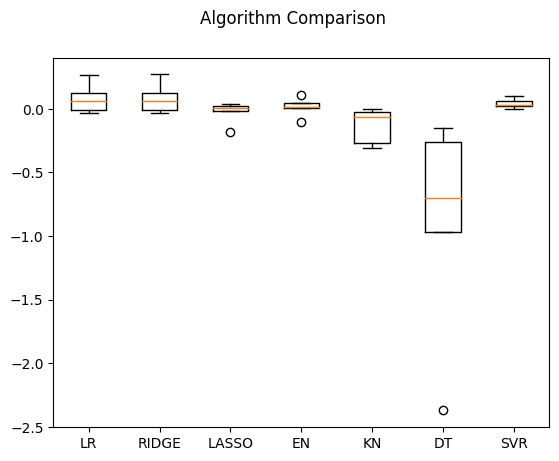

In [312]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import numpy as np

models = {}
models['LR'] = LinearRegression()
models['RIDGE'] = Ridge()
models['LASSO'] = Lasso()
models['EN'] = ElasticNet()
models['KN'] = KNeighborsRegressor()
models['DT'] = DecisionTreeRegressor()
models['SVR'] = SVR()

results = []
for name, model in models.items():
    cv_results = model_selection.cross_val_score(model, x, y,  cv=5, scoring="r2")
    results.append(cv_results)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()


In [313]:
lm = LinearRegression()

# create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Train the model using the training sets
lm.fit(x_train, y_train)

# predict on a separate testing set
predictions = lm.predict(x_test)

# compute the SSE
SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print(RMSE)

4.3028672508868935


In [314]:
print(lm.score(x_test,y_test))

0.1600749882151682


__B2__. The accuracy is not promissing (Only 16%), s we can plot the predicted and actual values to see where our model is making most errors

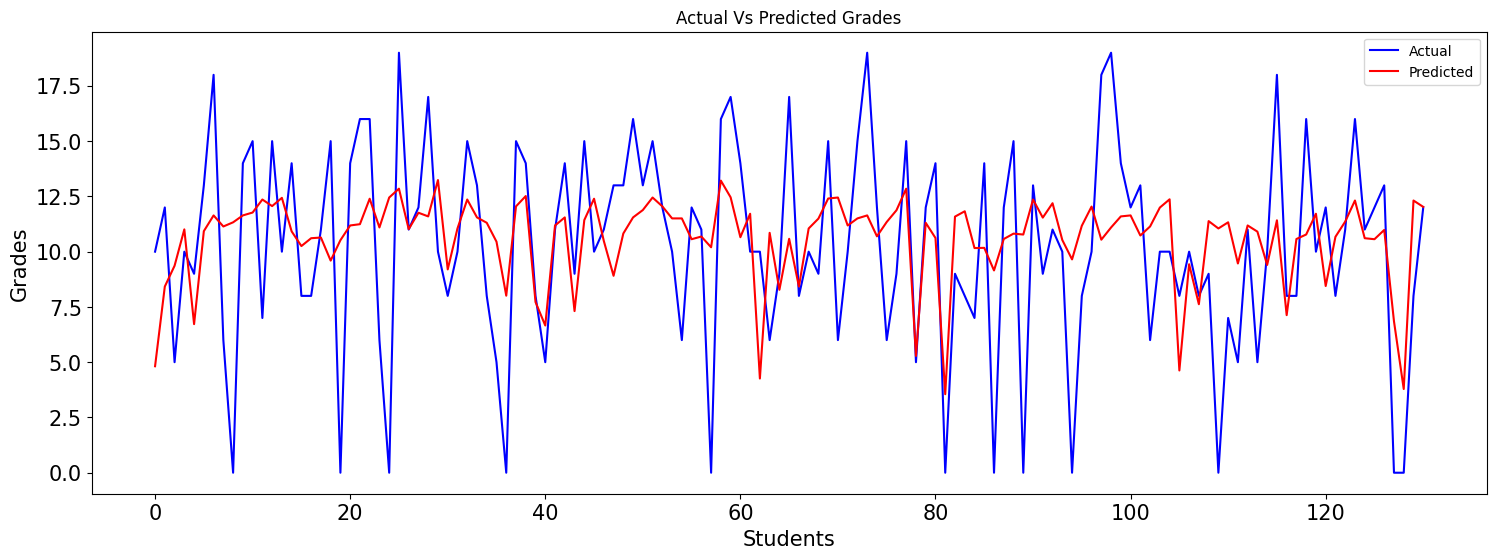

In [298]:
from matplotlib import pyplot as plt
linefig = plt.figure(figsize=(18,6))

x_axis = list(range(len(predictions)))

_  = plt.plot(x_axis, y_test, color="blue", label='Actual')
_  = plt.plot(x_axis, predictions, color="red", label="Predicted")

plt.tick_params(labelsize=15)

_ = plt.xlabel("Students",fontsize=15)
_ = plt.ylabel("Grades", fontsize=15)
plt.legend()
_ = plt.title("Actual Vs Predicted Grades")

__B2(Summary)__. We can see that the trend is similar but the predictions are not as close to actual. It seems that the model is able to predict the low graders better than high graders

__B3__. Let us try with fewer features and only focus on the top 2 (Past Failures and Mother's Education)

In [114]:
# Linear Regression

x = student_data[["failures","Medu"]].values
y = student_data["G3"]

print(x.shape)

(395, 2)


In [115]:
lm = LinearRegression()

# create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Train the model using the training sets
lm.fit(x_train, y_train)

# predict on a separate testing set
predictions = lm.predict(x_test)

# compute the SSE
SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print(RMSE)

4.286294431408094


In [116]:
print(lm.score(x_test,y_test))

0.16653259797234732


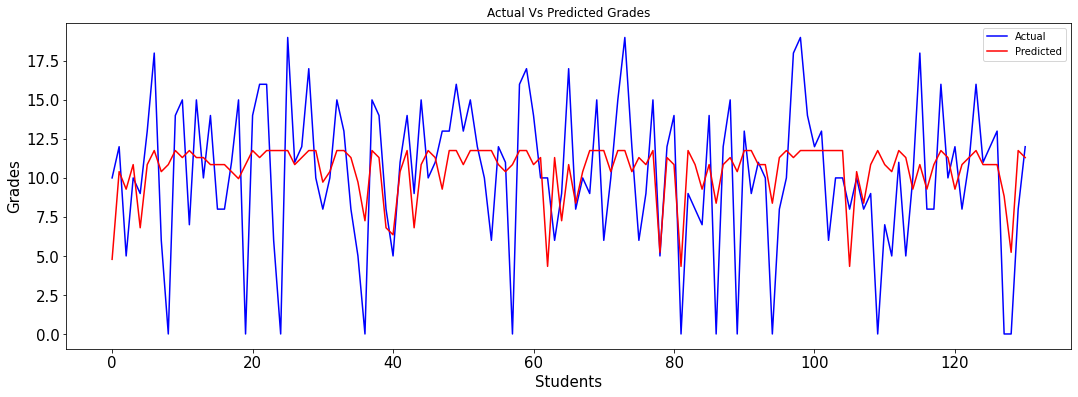

In [117]:
linefig = plt.figure(figsize=(18,6))

x_axis = list(range(len(predictions)))

_  = plt.plot(x_axis, y_test, color="blue", label='Actual')
_  = plt.plot(x_axis, predictions, color="red", label="Predicted")

plt.tick_params(labelsize=15)

_ = plt.xlabel("Students",fontsize=15)
_ = plt.ylabel("Grades", fontsize=15)
plt.legend()
_ = plt.title("Actual Vs Predicted Grades")

__B3(Summary)__ Not much Improvement. We can see that the trend is similar but the predictions are not as close to actual. It seems that the model is able to predict the low graders better than high graders, The Accuracy increase a bit to 16.6%

In [109]:
# Linear Regression

x = student_data[["failures"]].values
y = student_data["G3"]

print(x.shape)

(395, 1)


In [110]:
lm = LinearRegression()

# create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Train the model using the training sets
lm.fit(x_train, y_train)

# predict on a separate testing set
predictions = lm.predict(x_test)

# compute the SSE
SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print(RMSE)

4.3609938531325545


In [112]:
print(lm.score(x_test,y_test))

0.13722894272732822


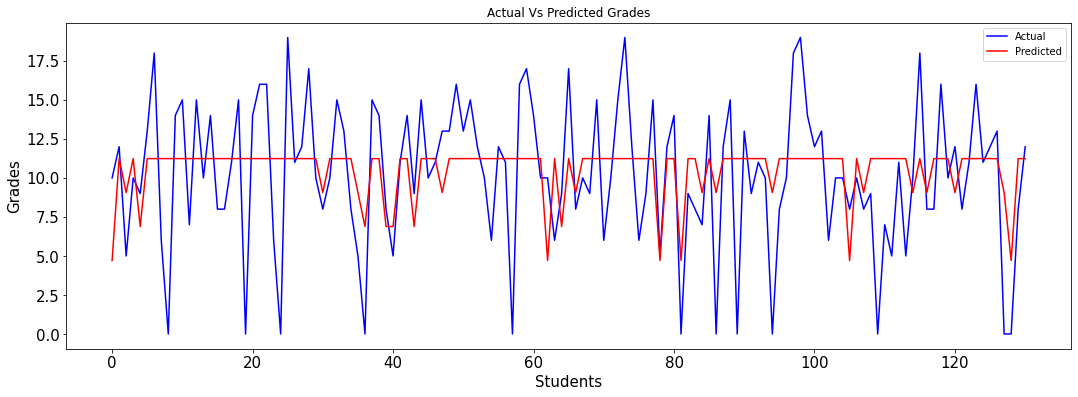

In [113]:
linefig = plt.figure(figsize=(18,6))

x_axis = list(range(len(predictions)))

_  = plt.plot(x_axis, y_test, color="blue", label='Actual')
_  = plt.plot(x_axis, predictions, color="red", label="Predicted")

plt.tick_params(labelsize=15)

_ = plt.xlabel("Students",fontsize=15)
_ = plt.ylabel("Grades", fontsize=15)
plt.legend()
_ = plt.title("Actual Vs Predicted Grades")

__B (Summary)__. It seems our prediction model is able to predict the lower grades better than higher graders and this itself is useful information for Parents and Teachers so that they can take corrective actions based on the set of input parameters